In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('MNIST_dataset.csv')

In [2]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data = np.array(data)
m, n = data.shape

# shuffle before splitting into dev and training sets
np.random.shuffle(data) 
m, n

(42000, 785)

In [4]:
# taking first 10000 images as test set
data_test = data[0:10000].T
Y_test = data_test[0]
X_test = data_test[1:n]
X_test = X_test / 255.

In [5]:
# taking other images as train set
data_train = data[10000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.

In [6]:
Y_train

array([9, 2, 5, ..., 1, 4, 4], dtype=int64)

### Helper Functions

In [7]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

### Evaluation Functions

In [8]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

### gradient descent

In [9]:
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 50 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [10]:
# actual training on dataset
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[4 4 8 ... 8 4 8] [9 2 5 ... 1 4 4]
0.10653125
Iteration:  50
[4 2 5 ... 1 4 7] [9 2 5 ... 1 4 4]
0.46009375
Iteration:  100
[9 2 5 ... 1 4 7] [9 2 5 ... 1 4 4]
0.61215625
Iteration:  150
[9 2 5 ... 1 4 7] [9 2 5 ... 1 4 4]
0.68553125
Iteration:  200
[9 2 5 ... 1 4 7] [9 2 5 ... 1 4 4]
0.7289375
Iteration:  250
[9 2 5 ... 1 4 9] [9 2 5 ... 1 4 4]
0.7571875
Iteration:  300
[9 2 5 ... 1 4 9] [9 2 5 ... 1 4 4]
0.777375
Iteration:  350
[9 2 5 ... 1 4 9] [9 2 5 ... 1 4 4]
0.79375
Iteration:  400
[9 2 5 ... 1 4 9] [9 2 5 ... 1 4 4]
0.8069375
Iteration:  450
[9 2 5 ... 1 4 9] [9 2 5 ... 1 4 4]
0.81784375


#### We get accuracy of ~81% accuracy on training set.

In [12]:
import pickle

params = {
    'W1': W1,
    'b1': b1,
    'W2': W2, 
    'b2': b2
}

# Pickle the dictionary
with open('params.pkl', 'wb') as file:
    pickle.dump(params, file)

# Unpickle the dictionary
with open('params.pkl', 'rb') as file:
    loaded_params = pickle.load(file)

# Access variables from the dictionary
W1 = loaded_params['W1']
b1 = loaded_params['b1']
W2 = loaded_params['W2']
b2 = loaded_params['b2']

### Evaluation

In [13]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [9]
Label:  9


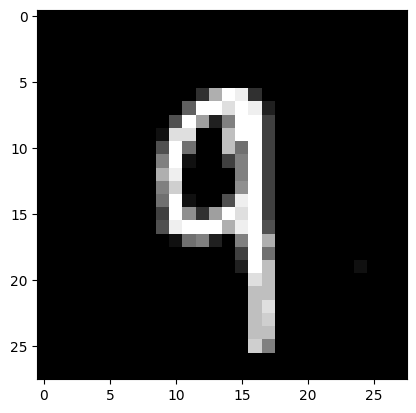

Prediction:  [2]
Label:  2


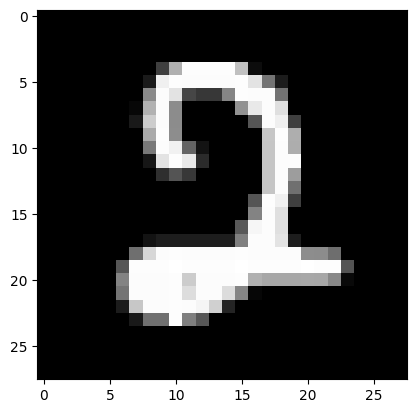

Prediction:  [5]
Label:  5


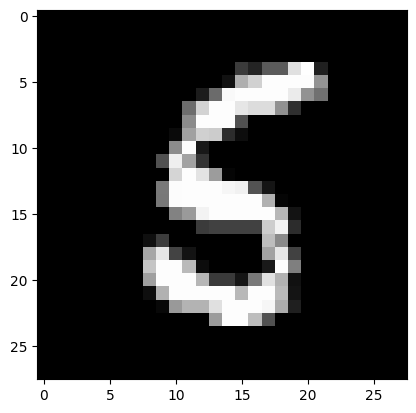

Prediction:  [7]
Label:  2


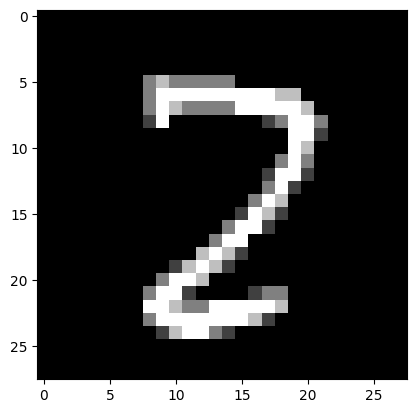

In [14]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [16]:
# Finally, let's find the accuracy on the test set:
dev_predictions = make_predictions(X_test, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_test)

[4 3 4 ... 1 2 5] [4 3 4 ... 2 2 5]


0.8198

#### Still 82% accuracy, so our model generalized from the training data pretty well.